<a href="https://colab.research.google.com/github/hmyrcmn/KUL/blob/main/decideLineTrueFalse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout

!git clone https://github.com/hmyrcmn/KUL.git

# Veri yükleme
true_folder = '/content/KUL/truedata'
X_data = []
Y_labels = []

for filename in os.listdir(true_folder):
    data = np.genfromtxt(os.path.join(true_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels.append(1)

false_folder = '/content/KUL/falsedata'
for filename in os.listdir(false_folder):
    data = np.genfromtxt(os.path.join(false_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels.append(0)

X_data = np.array(X_data)
Y_labels = np.array(Y_labels)
print("x_data shape: ",X_data.shape)
X_data

Cloning into 'KUL'...
remote: Enumerating objects: 58717, done.
remote: Counting objects: 100% (58717/58717), done.
remote: Compressing objects: 100% (683/683), done.
remote: Total 58717 (delta 58261), reused 58477 (delta 58027), pack-reused 0
Receiving objects: 100% (58717/58717), 24.93 MiB | 9.45 MiB/s, done.
Resolving deltas: 100% (58261/58261), done.
x_data shape:  (2000, 100, 1)


array([[[200.10677005],
        [199.41021706],
        [198.77841218],
        ...,
        [201.9444308 ],
        [203.36231439],
        [201.70454545]],

       [[200.3517316 ],
        [199.41021706],
        [198.77841218],
        ...,
        [201.9444308 ],
        [202.01229305],
        [201.70454545]],

       [[201.18903541],
        [199.41021706],
        [198.77841218],
        ...,
        [201.9444308 ],
        [202.01229305],
        [201.33357578]],

       ...,

       [[201.70454545],
        [202.16789834],
        [201.80143568],
        ...,
        [203.03753731],
        [203.65321407],
        [203.73376623]],

       [[201.25326981],
        [201.53584893],
        [202.94144137],
        ...,
        [203.90200013],
        [203.29109527],
        [204.3002405 ]],

       [[201.70454545],
        [201.53584893],
        [201.49991349],
        ...,
        [203.03753731],
        [203.29109527],
        [203.73376623]]])

In [2]:
# Verileri düzenleme ve normalleştirme
num_samples = len(X_data)
sequence_length = X_data.shape[1]
num_features = X_data.shape[2]

X_data_normalized = X_data.reshape(num_samples, sequence_length * num_features)

# Eğitim ve test setlerine bölme

X_train, X_test, y_train, y_test = train_test_split(X_data_normalized, Y_labels, test_size=0.2, random_state=42)

print("X_train.shape:",X_train.shape)
X_train

X_train.shape: (1600, 100)


array([[200.3517316 , 199.41021706, 198.77841218, ..., 201.9444308 ,
        202.01229305, 201.70454545],
       [200.3517316 , 196.92193699, 198.77841218, ..., 203.85316359,
        202.01229305, 201.70454545],
       [200.54206412, 198.5689157 , 198.77841218, ..., 201.9444308 ,
        202.01229305, 201.70454545],
       ...,
       [200.3517316 , 199.41021706, 198.77841218, ..., 201.9444308 ,
        202.01229305, 201.70454545],
       [201.70454545, 201.53584893, 201.49991349, ..., 203.03753731,
        203.29109527, 203.73376623],
       [201.70454545, 201.53584893, 202.29586113, ..., 203.03753731,
        203.29109527, 203.73376623]])

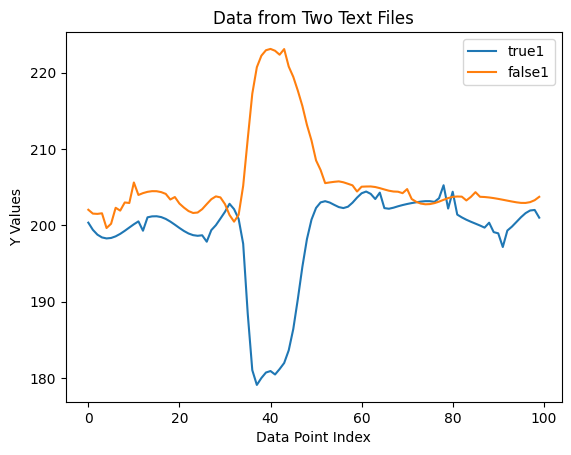

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the paths to your text files
true1 = '/content/KUL/truedata/smooth2001_0.txt'
false1 = '/content/KUL/falsedata/smooth2003_0.txt'

# Load data from the first text file
data1 = np.genfromtxt(true1, delimiter=',')
y_values1 = data1[:, 1]

# Load data from the second text file
data2 = np.genfromtxt(false1, delimiter=',')
y_values2 = data2[:, 1]

# Plot the data from both files on the same graph
plt.plot(y_values1, label='true1')
plt.plot(y_values2, label='false1')

# Add labels and title
plt.xlabel('Data Point Index')
plt.ylabel('Y Values')
plt.title('Data from Two Text Files')
plt.legend()
plt.show()


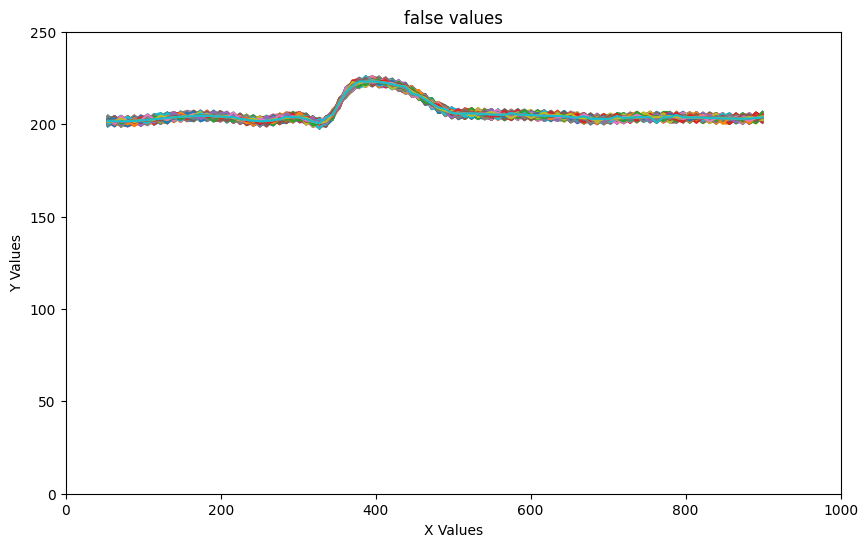

In [4]:
import os
import matplotlib.pyplot as plt

# Folder path where the text files are located
folder_path = '/content/KUL/falsedata'

# Get the list of all .txt files in the folder
file_names = [filename for filename in os.listdir(folder_path) if filename.endswith('.txt')]

# Lists to store x and y values from all files
all_x_values = []
all_y_values = []

# Process each file
for file_name in file_names:
    x_values = []  # To store x values for each file
    y_values = []  # To store y values for each file

    file_path = os.path.join(folder_path, file_name)

    with open(file_path, 'r') as f:
        for line in f.readlines():
            x_values.append(float(line.split(',')[0]))
            y_values.append(float(line.split(',')[1]))

    # Append x_values and y_values to the lists
    all_x_values.append(x_values)
    all_y_values.append(y_values)

    # Do something with x_values and y_values, for example, print or process further
    #print(f"File: {file_name}, X Values: {x_values}, Y Values: {y_values}")

# Plot the data
plt.figure(figsize=(10, 6))
for x_values, y_values in zip(all_x_values, all_y_values):
    plt.plot(x_values, y_values, label=f'Data from {file_name}')

plt.title('false values')
plt.xlabel('X Values')
plt.xlim(0, 1000)
plt.ylim(0, 250)
plt.ylabel('Y Values')
plt.show()


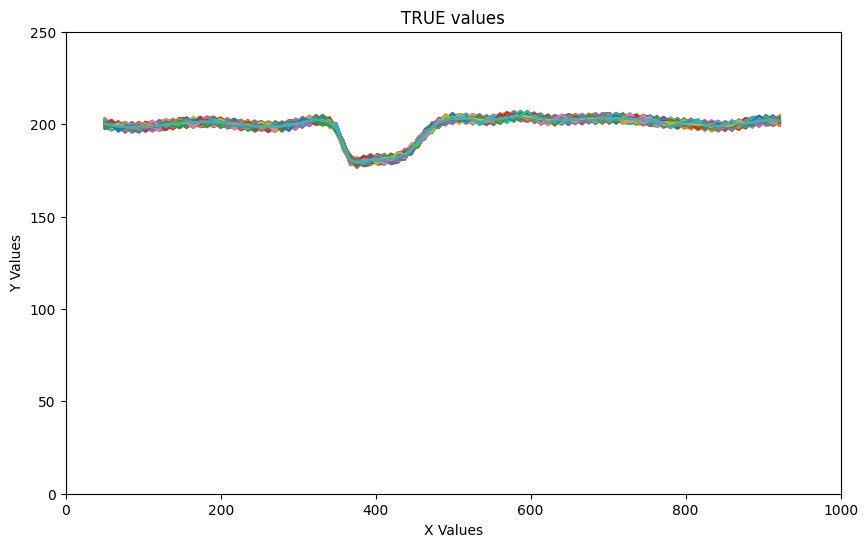

In [5]:
import os
import matplotlib.pyplot as plt

# Folder path where the text files are located
folder_path = '/content/KUL/truedata'

# Get the list of all .txt files in the folder
file_names = [filename for filename in os.listdir(folder_path) if filename.endswith('.txt')]

# Lists to store x and y values from all files
all_x_values = []
all_y_values = []

# Process each file
for file_name in file_names:
    x_values = []  # To store x values for each file
    y_values = []  # To store y values for each file

    file_path = os.path.join(folder_path, file_name)

    with open(file_path, 'r') as f:
        for line in f.readlines():
            x_values.append(float(line.split(',')[0]))
            y_values.append(float(line.split(',')[1]))

    # Append x_values and y_values to the lists
    all_x_values.append(x_values)
    all_y_values.append(y_values)

    # Do something with x_values and y_values, for example, print or process further
    #print(f"File: {file_name}, X Values: {x_values}, Y Values: {y_values}")

# Plot the data
plt.figure(figsize=(10, 6))
for x_values, y_values in zip(all_x_values, all_y_values):
    plt.plot(x_values, y_values, label=f'Data from {file_name}')

plt.title('TRUE values')
plt.xlabel('X Values')
plt.xlim(0, 1000)
plt.ylim(0, 250)
plt.ylabel('Y Values')
plt.show()


In [50]:
print("x:train shpe:",X_train.shape)
X_train

x:train shpe: (1600, 100)


array([[200.3517316 , 199.41021706, 198.77841218, ..., 201.9444308 ,
        202.01229305, 201.70454545],
       [199.16444233, 198.90804297, 198.77841218, ..., 201.9444308 ,
        202.01229305, 200.85723698],
       [200.3517316 , 200.72674371, 198.77841218, ..., 201.9444308 ,
        202.01229305, 201.70454545],
       ...,
       [200.3517316 , 199.41021706, 198.77841218, ..., 201.23574462,
        202.01229305, 201.70454545],
       [201.70454545, 201.53584893, 202.1536003 , ..., 202.61080506,
        203.29109527, 203.73376623],
       [201.70454545, 201.53584893, 203.59407332, ..., 204.40103527,
        203.29109527, 203.73376623]])

In [53]:
from keras.models import Sequential
from keras.layers import Conv1D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Veri setinizi yükleyin ve ön işleme yapın
# X_data, Y_labels = load_your_data_function()



# CNN modelini oluşturun
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(1600,100)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Modeli derleyin
from keras.optimizers import Adam

# 1. Adım: Optimizer'ı oluştururken modelin tüm değişkenlerini belirtin
optimizer = Adam(learning_rate=0.001)
optimizer.build(model.input_shape)  # Bu satırı ekleyin

# 2. Adım: Modeli derlerken bu özel optimizer'ı kullanın
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Eğitim işlemi
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
from sklearn.metrics import confusion_matrix, classification_report

# Modeli eğitme
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Modelin performansını değerlendirme
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Modelin tahminlerini alın
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)  # Eşik değeri üzerinden sınıflara dönüştürme

# Confusion matrix ve sınıflandırma raporu
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)



AttributeError: ignored

In [6]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model = Sequential()
model.add(Conv1D(32, kernel_size=15, activation='sigmoid', input_shape=(100, 1)))
model.add(Flatten())

# model.add(Dense(200, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))

model.add(Dense(50, activation='sigmoid'))


model.add(Dense(2, activation='softmax'))



# Modeli derleme
# model.compile(optimizer='adam',loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model özetini yazdırma
model.summary()
# Modeli eğitme
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Modelin performansını değerlendirme
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


# Model özetini yazdırma
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 86, 32)            512       
                                                                 
 flatten (Flatten)           (None, 2752)              0         
                                                                 
 dense (Dense)               (None, 100)               275300    
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 2)                 102       
                                                                 
Total params: 291064 (1.11 MB)
Trainable params: 291064 

13/13 [==============================] - 0s 3ms/step


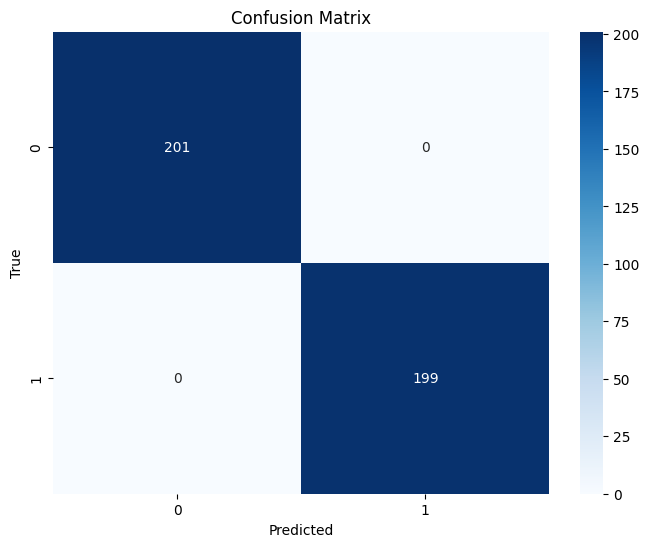

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Modelin tahminlerini alın
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba[:, 1] > 0.5).astype(int)  # Eşik değeri üzerinden sınıflara dönüştürme

# Confusion matrix oluşturun
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion matrix'i seaborn ile görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X_data_normalized, Y_labels, test_size=0.2, random_state=42)

# Sinir ağı modelini oluşturma
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(sequence_length * num_features,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(2, activation='relu'))

# Modeli derleme
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitme
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Modelin performansını değerlendirme
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Model özetini yazdırma
model.summary()


In [ ]:
from keras import layers

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(sequence_length * num_features,)))

model.add(Dense(50, activation='relu', input_shape=(sequence_length * num_features,)))

model.add(Dense(25, activation='relu'))

model.add(Dense(12, activation='relu'))

model.add(Dense(2, activation='relu'))
# Modeli derleme
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitme
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

# Modelin performansını değerlendirme
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Model özetini yazdırma
model.summary()


In [8]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout

!git clone https://github.com/hmyrcmn/KUL.git

# Veri yükleme
true_folder = '/content/KUL/errors/true'
X_data = []
Y_labels = []

for filename in os.listdir(true_folder):
    data = np.genfromtxt(os.path.join(true_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels.append(1)

false_folder = '/content/KUL/errors/false'
for filename in os.listdir(false_folder):

    data = np.genfromtxt(os.path.join(false_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels.append(0)

X_data = np.array(X_data)
Y_labels = np.array(Y_labels)
print("x_data shape: ",X_data.shape)
X_data[0]

# Verileri düzenleme ve normalleştirme
num_samples = len(X_data)
sequence_length = X_data.shape[1]
num_features = X_data.shape[2]

X_data_normalized2 = X_data.reshape(num_samples, sequence_length * num_features)
print("y:",Y_labels.shape)
Y_labels





fatal: destination path 'KUL' already exists and is not an empty directory.
x_data shape:  (10, 100, 1)
y: (10,)


array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [9]:
# Model ile tahmin yapma
predictions = model.predict(X_data_normalized2)

# Tahmin sonuçlarını eşik değere göre ikili sınıflara dönüştürme
binary_predictions = (predictions > 0.5).astype(int)

# Her bir örnek için tahmin edilen sınıfı ve olasılığı yazdırma
for i in range(len(binary_predictions)):
    predicted_class = binary_predictions[i][0]  # Sadece ilk sınıfın tahminini al
    probability = predictions[i][predicted_class]  # Tahmin edilen sınıfa ait olasılığı al
    print(f"Sample {i + 1}: Predicted Class: {predicted_class}, Probability: {probability:.4f}")



1/1 [==============================] - 0s 23ms/step
Sample 1: Predicted Class: 0, Probability: 0.4908
Sample 2: Predicted Class: 0, Probability: 0.4908
Sample 3: Predicted Class: 0, Probability: 0.4908
Sample 4: Predicted Class: 0, Probability: 0.4907
Sample 5: Predicted Class: 0, Probability: 0.4908
Sample 6: Predicted Class: 1, Probability: 0.4847
Sample 7: Predicted Class: 1, Probability: 0.4847
Sample 8: Predicted Class: 1, Probability: 0.4849
Sample 9: Predicted Class: 1, Probability: 0.4847
Sample 10: Predicted Class: 1, Probability: 0.4847


In [63]:
# Model ile tahmin yapma
predictions = model.predict(X_data_normalized2)

# Tahmin sonuçlarını eşik değere göre ikili sınıflara dönüştürme
binary_predictions = (predictions > 0.5).astype(int)

# Her bir örnek için tahmin edilen sınıfı ve olasılığı yazdırma
for i in range(len(binary_predictions)):
    predicted_class = binary_predictions[i][0]  # Sadece ilk sınıfın tahminini al
    probability = predictions[i][predicted_class]  # Tahmin edilen sınıfa ait olasılığı al
    print(f"Sample {i + 1}: Predicted Class: {predicted_class}, Probability: {probability:.4f}")



1/1 [==============================] - 0s 136ms/step
Sample 1: Predicted Class: 0, Probability: 0.4991
Sample 2: Predicted Class: 0, Probability: 0.4992
Sample 3: Predicted Class: 0, Probability: 0.4991
Sample 4: Predicted Class: 1, Probability: 0.4876
Sample 5: Predicted Class: 1, Probability: 0.4875
Sample 6: Predicted Class: 1, Probability: 0.4875
